<a href="https://colab.research.google.com/github/clinton-mwachia/Deep-Learning/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [40]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [51]:
# z score nomalization
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [52]:
x_train.shape

(60000, 28, 28, 1)

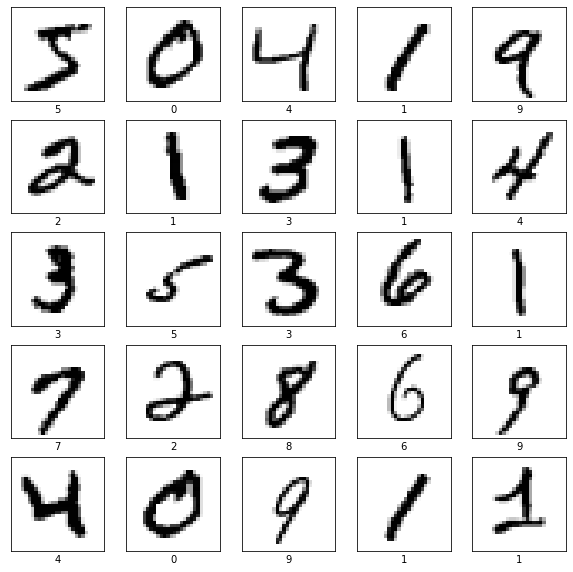

In [43]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [55]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.7280 - accuracy: 0.7513 - val_loss: 0.2783 - val_accuracy: 0.9090
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2233 - accuracy: 0.9296 - val_loss: 0.1507 - val_accuracy: 0.9505
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1413 - accuracy: 0.9568 - val_loss: 0.1065 - val_accuracy: 0.9663
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1060 - accuracy: 0.9669 - val_loss: 0.0836 - val_accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0877 - accuracy: 0.9725 - val_loss: 0.0798 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0748 - accuracy: 0.9758 - val_loss: 0.0631 - val_accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0661 - accuracy: 0.9795 - val_loss: 0.0645 -

313/313 - 3s - loss: 0.0465 - accuracy: 0.9859


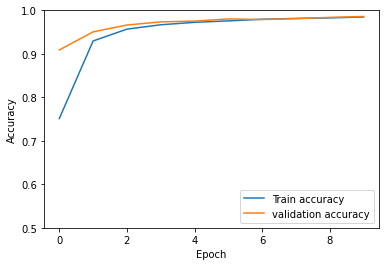

In [58]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [61]:
test_acc * 100 

98.58999848365784

In [63]:
model_json = model.to_json()

with open('model_json', 'w') as json_file:
  json_file.write(model_json)

model.save_weights('model.h5')